<a href="https://colab.research.google.com/github/AnaAleixo/Caiporas-PA-III/blob/main/Etapa_Final_Projeto_aplicado_III_Documenta%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DESENVOLVIMENTO DE UM SISTEMA DE RECOMENDAÇÃO DE LIVROS USANDO SVD


Este projeto faz parte dos requisitos da atividade de conclusão da disciplina de Projeto Aplicado III, do Curso de Tecnologia em Ciência de Dados. Realizado no 2º Semestre de 2024. O objetivo é aplicar os conhecimentos adquiridos ao longo do curso para abordar uma tendencia que envolve o a oferta de livros e a aquisição pelo consumidor, e para tanto será tratado a abordagem do sistema de recomendação.

In [ ]:
#Importando a biblioteca pandas:
!pip install pandas

In [ ]:
# Definição das Bibliotecas
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Código para importação dos dados
books = pd.read_csv('/content/BX_Books.csv', encoding='latin1', delimiter=';')
users = pd.read_csv('/content/BX-Users.csv', encoding='latin1', delimiter=';')
ratings = pd.read_csv('/content/BX-Book-Ratings.csv', encoding='latin1', delimiter=';')


In [ ]:
import pandas as pd

books = pd.read_csv('/content/BX_Books.csv', encoding='latin1', on_bad_lines='skip')
users = pd.read_csv('/content/BX-Users.csv', encoding='latin1', on_bad_lines='skip')
ratings = pd.read_csv('/content/BX-Book-Ratings.csv', encoding='latin1', on_bad_lines='skip')


In [ ]:
# Instalando a biblioteca surprise
!pip install scikit-surprise

# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate, train_test_split as surprise_train_test_split



In [ ]:
#Definição das Bibliotecas Python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate, train_test_split as surprise_train_test_split


In [ ]:
books = pd.read_csv('/content/BX_Books.csv', encoding='latin1', delimiter=';')
users = pd.read_csv('/content/BX-Users.csv', encoding='latin1', delimiter=';')
ratings = pd.read_csv('/content/BX-Book-Ratings.csv', encoding='latin1', delimiter=';')


In [ ]:
# Análise Exploratória da Base de Dados
print(books.columns)
print(users.columns)
print(ratings.columns)


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['User-ID', 'Location', 'Age'], dtype='object')
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [ ]:
print(ratings['Book-Rating'].mean())


2.8669501991685364


In [ ]:
# Removendo colunas de imagem
books = books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])

# Tratando valores ausentes em 'Age'
users['Age'].fillna(users['Age'].mean(), inplace=True)
users['Age'] = users['Age'].astype(int)  # Convertendo para inteiro, se necessário


count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64
Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


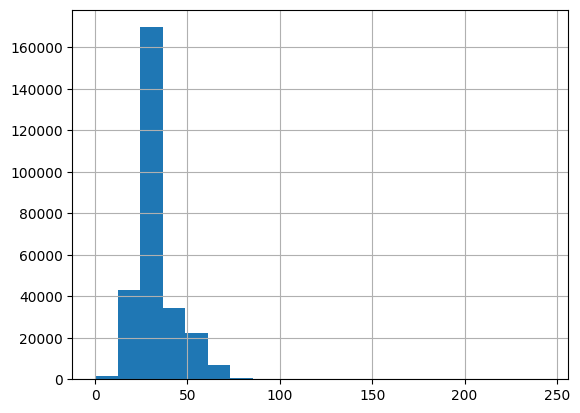

In [ ]:
# Estatísticas descritivas para as classificações
print(ratings['Book-Rating'].describe())

# Contagem de livros por autor
print(books['Book-Author'].value_counts().head())

# Distribuição de idade dos usuários
print(users['Age'].hist(bins=20))


In [ ]:
# Contagem de classificações por ISBN
rating_counts = ratings['ISBN'].value_counts()
ratings = ratings[ratings['ISBN'].isin(rating_counts[rating_counts > 10].index)]

# Contagem de classificações por usuário
user_counts = ratings['User-ID'].value_counts()
ratings = ratings[ratings['User-ID'].isin(user_counts[user_counts > 10].index)]


In [ ]:
#Treinamento de um Modelo Inicial
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

# Criando o dataset para o Surprise
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

# Treinando o modelo SVD
model = SVD()
model.fit(trainset)
predictions = model.test(testset)

# Avaliando o modelo
print(accuracy.rmse(predictions))


RMSE: 3.5168
3.5167884635631808


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271379, 8)
(1149780, 3)
(278858, 3)


In [ ]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [ ]:
pip install numpy pandas scikit-surprise


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
import os

# Listando arquivos no diretório /content
print(os.listdir('/content'))


['.config', 'BX-Book-Ratings.csv', 'BX-Users.csv', 'Preprocessed_data.csv', 'BX_Books.csv', 'sample_data']


In [ ]:
import pandas as pd

# Carregando os dados
books = pd.read_csv('/content/BX_Books.csv', encoding='latin1', delimiter=';')
users = pd.read_csv('/content/BX-Users.csv', encoding='latin1', delimiter=';')
ratings = pd.read_csv('/content/BX-Book-Ratings.csv', encoding='latin1', delimiter=';')


In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split

# Carregar os dados
books = pd.read_csv('/content/BX_Books.csv', encoding='latin1', delimiter=';')
users = pd.read_csv('/content/BX-Users.csv', encoding='latin1', delimiter=';')
ratings = pd.read_csv('/content/BX-Book-Ratings.csv', encoding='latin1', delimiter=';')

# Criar um dataset Surprise com as avaliações dos usuários
reader = Reader(rating_scale=(0, 10))  # Ajustando a escala
data = Dataset.load_from_df(ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)


In [ ]:
# Instanciar e treinar o modelo SVD
model = SVD()
model.fit(trainset)


In [ ]:
from surprise import accuracy

# Fazeendo previsões no conjunto de teste
predictions = model.test(testset)

# Calcular RMSE
accuracy.rmse(predictions)


RMSE: 3.4961


3.4961206688160256

#TESTANDO O SISTEMA

In [ ]:
# Função para retornar as top-N recomendações para um usuário específico
def get_top_n_recommendations(user_id, n=10):
    # Pegar todos os livros que o usuário não avaliou ainda
    user_rated_books = ratings[ratings['User-ID'] == user_id]['ISBN'].unique()
    all_books = books['ISBN'].unique()
    unrated_books = [book for book in all_books if book not in user_rated_books]

    # Prever a avaliação para cada livro não avaliado
    predictions = [model.predict(user_id, isbn) for isbn in unrated_books]

    # Ordenar as previsões por avaliação estimada de forma descendente
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Retornar os top-N livros recomendados
    top_n_books = predictions[:n]
    return [(pred.iid, pred.est) for pred in top_n_books]

# Exemplo testte de uso: Suponha que o ID do usuário seja 276725
recommended_books = get_top_n_recommendations(276725, n=5)
print("Top 5 Recommended Books:")
for isbn, rating_est in recommended_books:
    book_info = books[books['ISBN'] == isbn]
    print(f"ISBN: {isbn}, Book Title: {book_info['Book-Title'].values[0]}, Estimated Rating: {rating_est}")


Top 5 Recommended Books:
ISBN: 1844262553, Book Title: Free, Estimated Rating: 7.126027635958294
ISBN: 0439139597, Book Title: Harry Potter and the Goblet of Fire (Book 4), Estimated Rating: 5.757469540607819
ISBN: 0615116426, Book Title: Marching Through Culpeper : A Novel of Culpeper, Virginia, Crossroads of the Civil War, Estimated Rating: 5.754267365901658
ISBN: 0060256672, Book Title: Where the Sidewalk Ends : Poems and Drawings, Estimated Rating: 5.68012868697449
ISBN: 0091842050, Book Title: The Blue Day Book: A Lesson in Cheering Yourself Up, Estimated Rating: 5.628655602953533
